In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [3]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
# Checking for the null values

In [6]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [7]:
df.drop(["other_fuel1", "other_fuel2", "other_fuel3", "owner", "wepp_id", "generation_gwh_2013",
        "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017","generation_gwh_2018" ,"generation_gwh_2019",
        "generation_data_source", "estimated_generation_gwh"], axis=1, inplace=True)

In [8]:
df.shape

(907, 13)

In [9]:
df.nunique().to_frame("Unique Values")

,Unique Values
country,1
country_long,1
name,907
gppd_idnr,907
capacity_mw,361
latitude,836
longitude,827
primary_fuel,8
commissioning_year,73
source,191


In [10]:
df.drop(["country", "country_long", "year_of_capacity_data", "name", "gppd_idnr", "url"], axis=1, inplace=True)

In [11]:
# Removed the colums that were not providing any information for the model.

In [12]:
print(df.shape)
df.head()

(907, 7)


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI


In [13]:
# Checking for the null values

In [14]:
df.isna().sum()

capacity_mw             0
latitude               46
longitude              46
primary_fuel            0
commissioning_year    380
source                  0
geolocation_source     19
dtype: int64

In [15]:
# Still there are some missing values in the dataset which are to treated.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   capacity_mw         907 non-null    float64
 1   latitude            861 non-null    float64
 2   longitude           861 non-null    float64
 3   primary_fuel        907 non-null    object 
 4   commissioning_year  527 non-null    float64
 5   source              907 non-null    object 
 6   geolocation_source  888 non-null    object 
dtypes: float64(4), object(3)
memory usage: 49.7+ KB


In [17]:
# getting list of object data type column names
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_datatype.append(x)
print(f"Object Data Type Columns are: ", object_datatype)


# getting the list of float data type column names
float_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64':
        float_datatype.append(x)
print(f"Float Data Type Columns are: ", float_datatype)

Object Data Type Columns are:  ['primary_fuel', 'source', 'geolocation_source']
Float Data Type Columns are:  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year']


In [18]:
# Bifurcated the object and float data type columns.

In [19]:
# filling missing data for continous values with mean
df["latitude"].fillna(df["latitude"].mean(),inplace=True)
df["longitude"].fillna(df["longitude"].mean(),inplace=True)

# filling missing data for categorical values with mode
df["commissioning_year"].fillna(df["commissioning_year"].mode()[0],inplace=True)
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0],inplace=True)

In [20]:
# Filling the null values in continous data column with its mean and categorail data witnits mode.

In [21]:
df.isna().sum()

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
commissioning_year    0
source                0
geolocation_source    0
dtype: int64

In [22]:
# no missing or null values in the dataset

In [23]:
for col in object_datatype:
    print(col)
    print(df[col].value_counts())
    print("="*120)

primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64
source
Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64
geolocation_source
WRI                            

In [24]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source'],
      dtype='object')

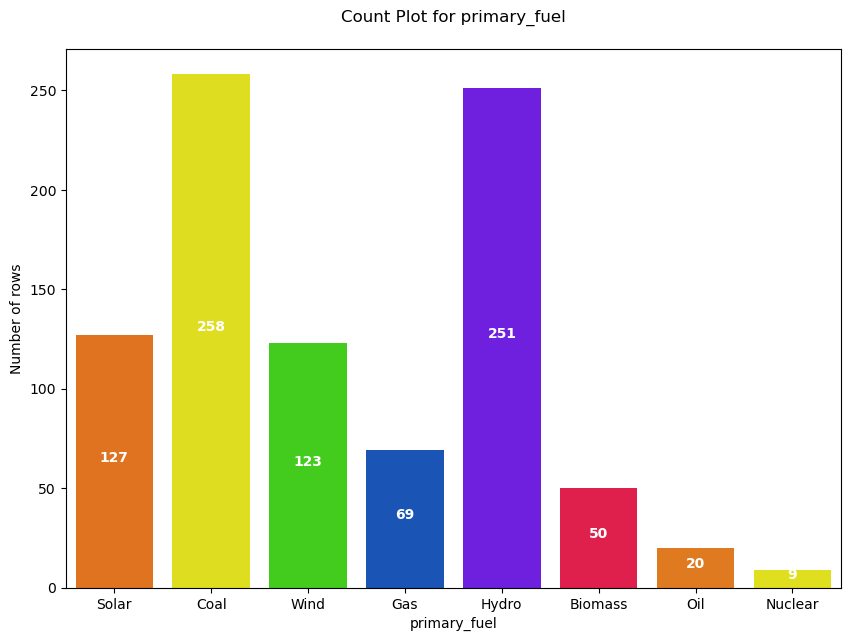

In [25]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'primary_fuel'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

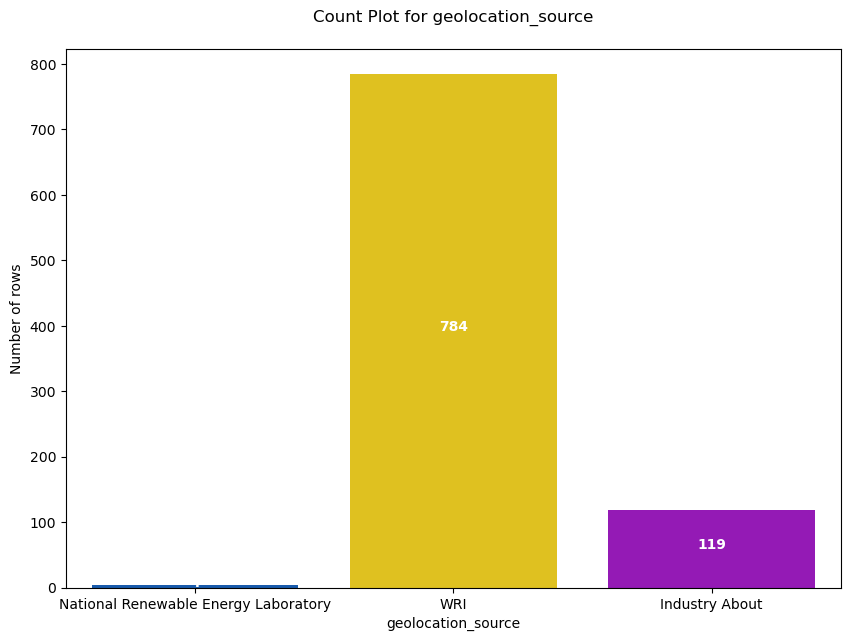

In [26]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'geolocation_source'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

Findings--
Count plot for "geolocation_source" column the highest data value is covered by WRI option and the least value which seems quite negligible has been accumulated by National Renewable Energy Laboratory.

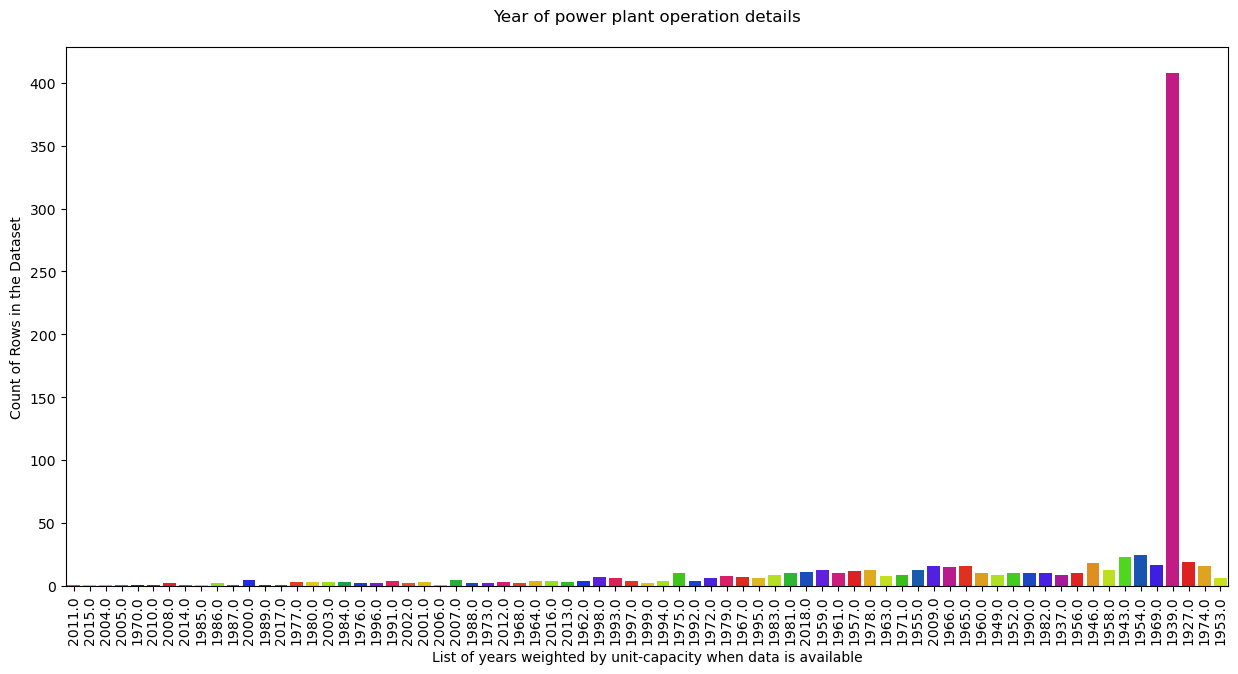

In [28]:
plt.figure(figsize=(15,7))
values = list(df['commissioning_year'].unique())
diag = sns.countplot(df["commissioning_year"], palette="prism")
diag.set_xticklabels(labels=values, rotation=90)
plt.title("Year of power plant operation details\n")
plt.xlabel("List of years weighted by unit-capacity when data is available")
plt.ylabel("Count of Rows in the Dataset")
plt.show()

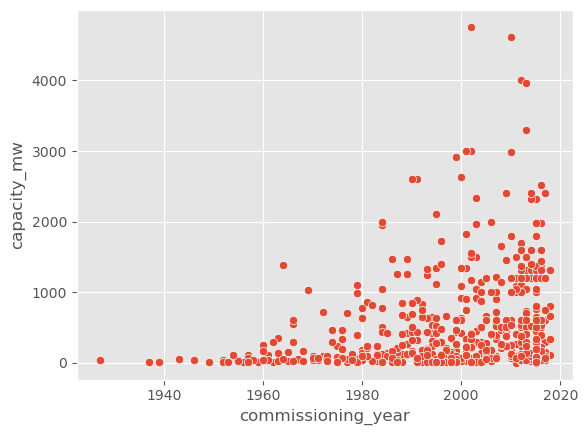

In [29]:
plt.style.use('ggplot')
sns.scatterplot(x = "commissioning_year", y = "capacity_mw", data = df)
plt.show()

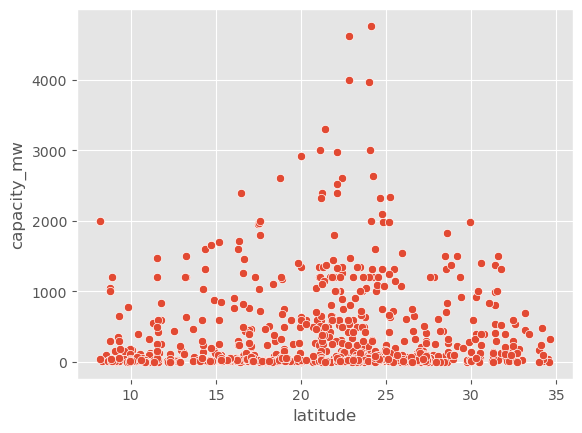

In [30]:
sns.scatterplot(x = "latitude", y = "capacity_mw", data = df)
plt.show()

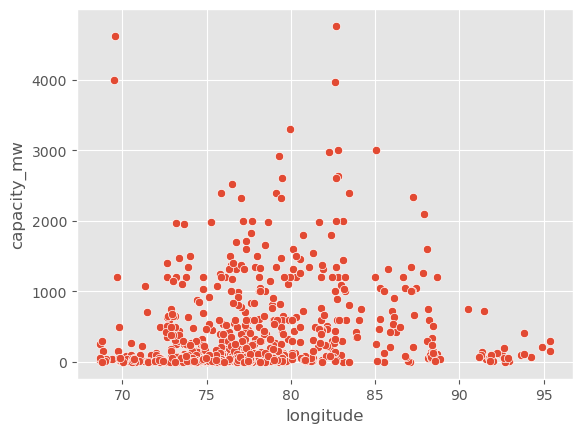

In [31]:
sns.scatterplot(x = "longitude", y = "capacity_mw", data = df)
plt.show()

In [ ]:
plt.style.use('seaborn-pastel')
sns.catplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

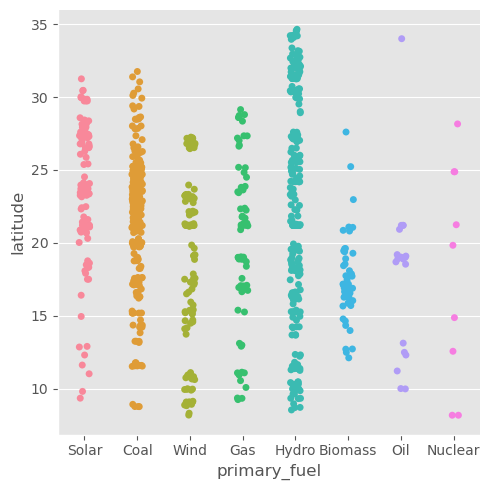

In [32]:
sns.catplot(x = "primary_fuel", y = "latitude", data = df)
plt.show()

Finding--
In the categorical plot we can see that hydro fuel type is distributed across all the latitude values considering the water bodies that help in generating electricity at a power plant.

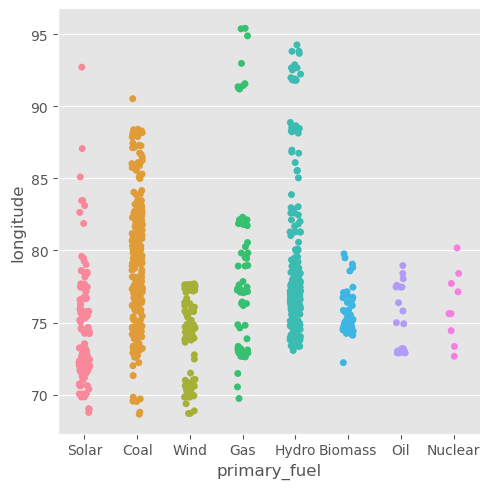

In [33]:
sns.catplot(x = "primary_fuel", y = "longitude", data = df)
plt.show()

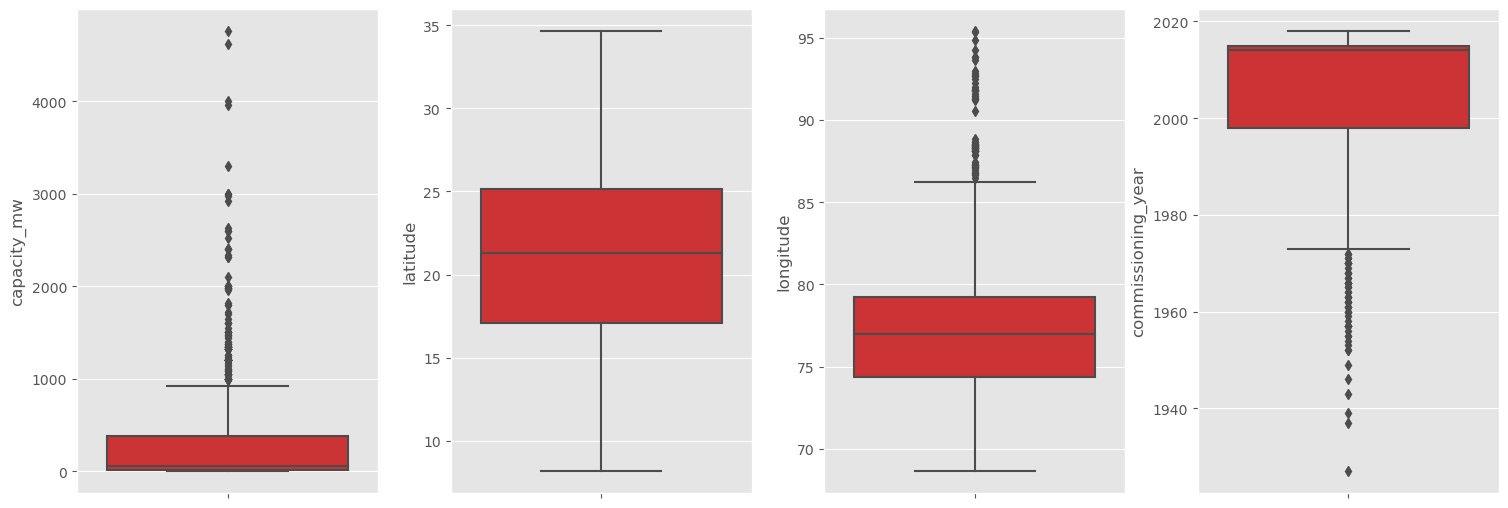

In [34]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[float_datatype].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Set1")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

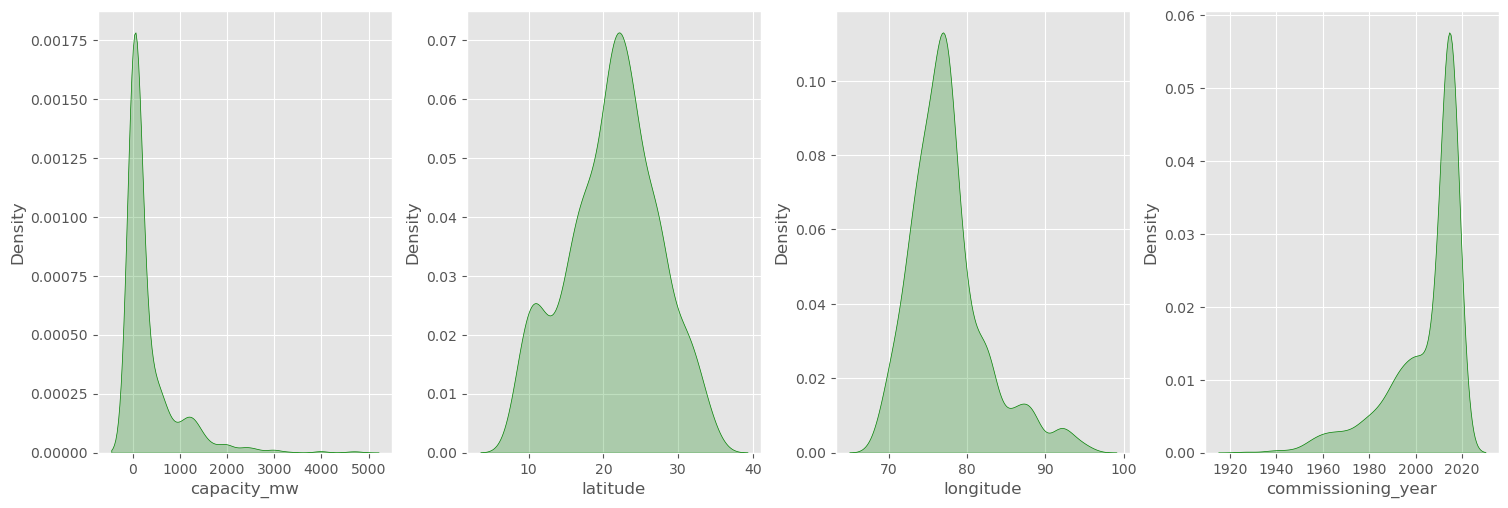

In [35]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[float_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

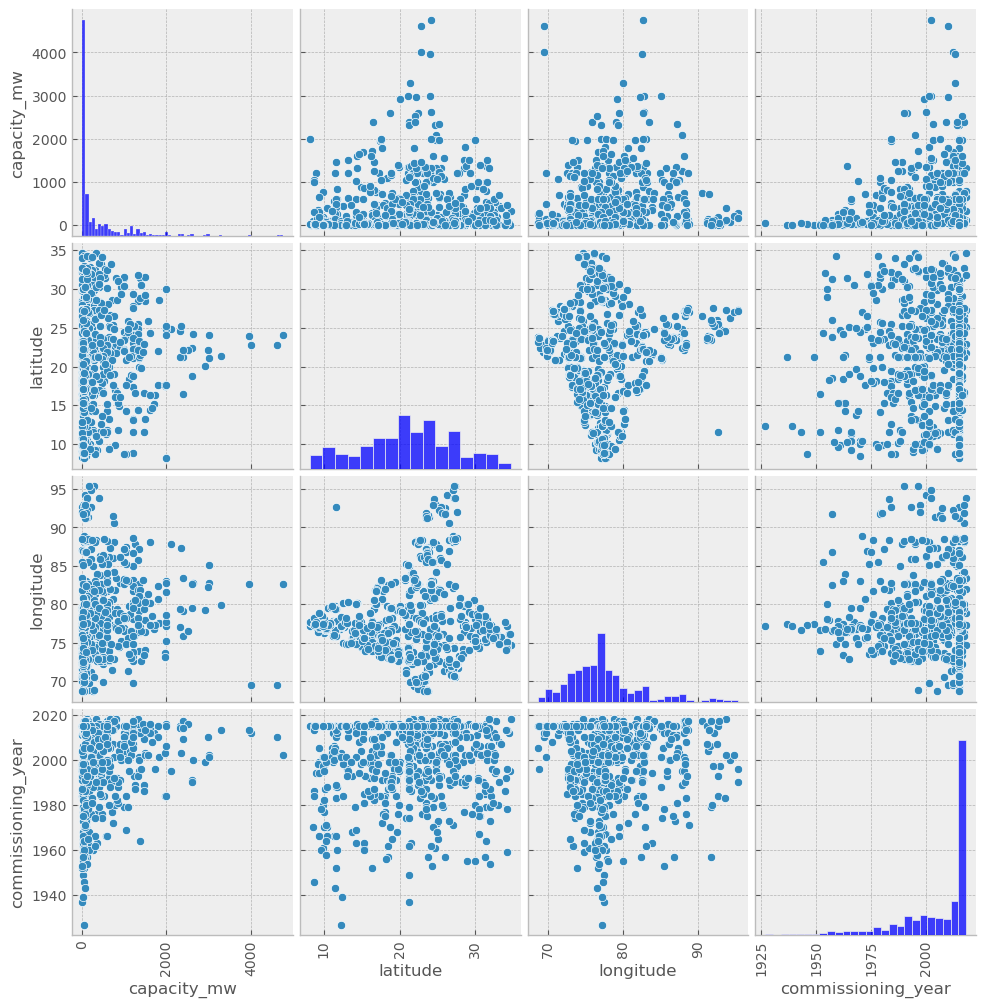

In [36]:
plt.style.use('bmh')
g = sns.pairplot(df)
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

In [37]:
# Encoding all the object datatype column

In [38]:
# Label Encoder

le = LabelEncoder()
df["primary_fuel"] = le.fit_transform(df["primary_fuel"])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,1,2015.0,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,7,2015.0,CDM,WRI
3,135.0,23.8712,91.3602,2,2004.0,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,1,2015.0,Central Electricity Authority,WRI


In [39]:
#Label Encoder is used on target column "primary_fuel" as we want our labels to be converted from the object datatype to numerical datatype

In [40]:
# Ordinal Encoder

oe = OrdinalEncoder()
df['geolocation_source'] = oe.fit_transform(df['geolocation_source'].values.reshape(-1,1))
df['source'] = oe.fit_transform(df['source'].values.reshape(-1,1))
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,109.0,1.0
1,98.0,24.7663,74.6090,1,2015.0,174.0,2.0
2,39.2,21.9038,69.3732,7,2015.0,21.0,2.0
3,135.0,23.8712,91.3602,2,2004.0,22.0,2.0
4,1800.0,21.9603,82.4091,1,2015.0,22.0,2.0


In [41]:
# Ordinal Encoder is used to convert all the categorical feature columns from object datatype to numerical datatype.The "source" column has lots of unique values the number of columns would have increased a lot so used the ordinal encoding.

In [42]:
# Correlation -- By heatmap

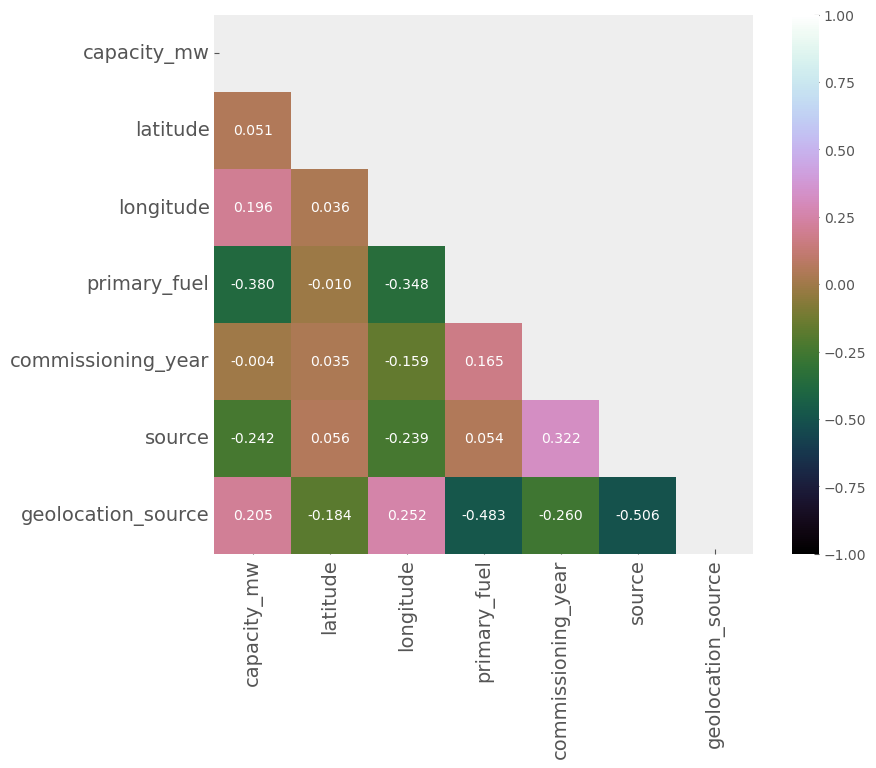

In [43]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cubehelix", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [44]:
# Correlation Bar Plot--- To compare features with lables

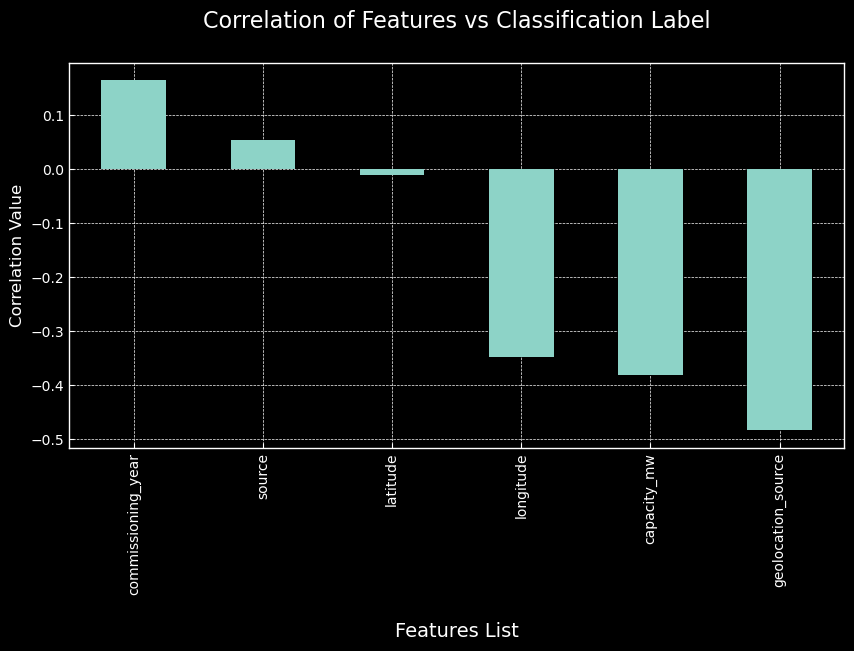

In [45]:
plt.style.use('dark_background')
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot.bar()
plt.title("Correlation of Features vs Classification Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

In [46]:
# Considering classification label "primary_fuel" then we can see the remaining columns that are the features have 2 of them with positive correlation and 4 of them with neagtive correlation.

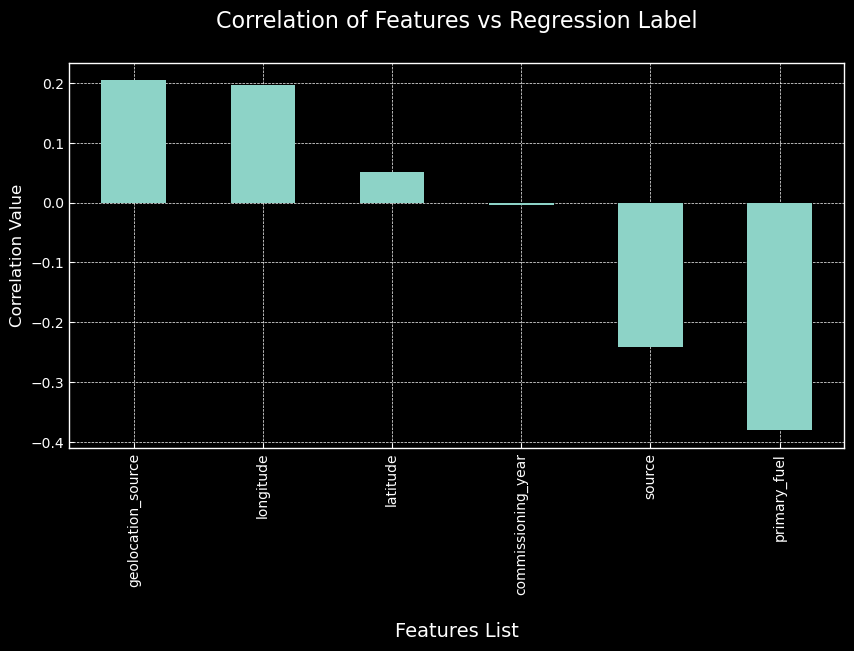

In [47]:
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['capacity_mw'].sort_values(ascending=False).drop('capacity_mw').plot.bar()
plt.title("Correlation of Features vs Regression Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

In [48]:
# Considering regression label "capacity_mw" then we can see the remaining columns that are the features have 4 of them with positive correlation and 2 of them with neagtive correlation.

In [49]:
# Z score to remove outliers

In [50]:
# Reassigning the changed dataframe name to our original dataframe name
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() 

Shape of the dataframe before removing outliers:  (907, 7)
Shape of the dataframe after removing outliers:  (838, 7)
Percentage of data loss post outlier removal:  7.6074972436604185


In [51]:
df.skew()

capacity_mw           1.967086
latitude             -0.112601
longitude             0.903442
primary_fuel          0.418559
commissioning_year   -1.500521
source                1.792245
geolocation_source   -2.112259
dtype: float64

In [52]:
#By the skew method we see that there are columns present in our dataset that are above the acceptable range of +/-0.5 skewness value.

In [53]:
#Using Log Transform to fix skewnes

In [54]:
for col in float_datatype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [55]:
# Splitting the dataset into  'X' and 'Y' for feature and classification label

In [56]:
X = df.drop('primary_fuel', axis=1)
Y = df['primary_fuel']

In [57]:
# classification label X represents all the feature columns and Y represents the classification target label column.

In [58]:
Y.value_counts()

1    234
3    222
7    123
6    121
2     64
0     45
5     20
4      9
Name: primary_fuel, dtype: int64

In [59]:
# Listing the values of our classification label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method.

In [60]:
# adding samples to make all the categorical label values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [61]:
# SMOTE is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [62]:
Y.value_counts()

6    234
1    234
7    234
2    234
3    234
0    234
5    234
4    234
Name: primary_fuel, dtype: int64

In [63]:
# After applying over sampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the classification machine learning model does not get biased towards one category.

In [64]:
# Feature Scaling

In [65]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,-1.760894,1.443718,-0.854872,0.401978,1.397286,-1.185978
1,0.173425,0.844331,-0.461172,0.725118,2.867819,0.370008
2,-0.348156,0.342299,-2.008197,0.725118,-0.593589,0.370008
3,0.357192,0.687346,3.852928,-0.163516,-0.570965,0.370008
4,1.852305,0.352208,1.655386,0.725118,-0.570965,0.370008


In [66]:
#Scaling feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

In [67]:
# Finding best random state for bulding Classification Models

In [68]:
maxAccu=0
maxRS=0

for i in range(1, 500):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 72.64957264957265 on Random State 45


In [69]:
# Machine Learning Model for Classification with Evaluation Metrics

In [70]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=45)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [71]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85        69
           1       0.53      0.53      0.53        47
           2       0.39      0.33      0.36        36
           3       0.70      0.48      0.57        77
           4       0.68      0.92      0.78        64
           5       0.60      0.53      0.56        55
           6       1.00      1.00      1.00        57
           7       0.83      0.98      0.90        63

    accuracy                           0.73       468
   macro avg       0.70      0.70      0.69       468
weighted avg       0.72      0.73      0.72       468

Accuracy Score: 72.64957264957265
Cross Validation Score: 67.41376114081996

Accuracy Score - Cross Validation Score is 5.23581150875269


In [88]:
#Created the Logistic Regression Model and checked for it's evaluation metrics.

In [72]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96        69
           1       0.69      0.70      0.69        47
           2       0.62      0.44      0.52        36
           3       0.96      0.71      0.82        77
           4       0.73      1.00      0.84        64
           5       0.87      0.84      0.85        55
           6       1.00      1.00      1.00        57
           7       0.88      1.00      0.93        63

    accuracy                           0.85       468
   macro avg       0.84      0.83      0.83       468
weighted avg       0.86      0.85      0.85       468

Accuracy Score: 85.25641025641025
Cross Validation Score: 79.59344028520499

Accuracy Score - Cross Validation Score is 5.662969971205257


In [89]:
# Created the Support Vector Classifier Model and checked for it's evaluation metrics

In [73]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        69
           1       0.65      0.64      0.65        47
           2       0.62      0.67      0.64        36
           3       0.82      0.77      0.79        77
           4       0.87      0.91      0.89        64
           5       0.81      0.85      0.83        55
           6       1.00      1.00      1.00        57
           7       1.00      1.00      1.00        63

    accuracy                           0.86       468
   macro avg       0.84      0.84      0.84       468
weighted avg       0.86      0.86      0.86       468

Accuracy Score: 85.8974358974359
Cross Validation Score: 85.95294117647059

Accuracy Score - Cross Validation Score is -0.0555052790346906


In [75]:
# Created the Decision Tree Classifier Model and checked for it's evaluation metrics.

In [74]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=42)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        69
           1       0.77      0.77      0.77        47
           2       0.66      0.81      0.73        36
           3       0.97      0.79      0.87        77
           4       0.88      0.98      0.93        64
           5       0.95      0.95      0.95        55
           6       1.00      1.00      1.00        57
           7       1.00      1.00      1.00        63

    accuracy                           0.91       468
   macro avg       0.90      0.91      0.90       468
weighted avg       0.92      0.91      0.92       468

Accuracy Score: 91.45299145299145
Cross Validation Score: 89.95793226381463

Accuracy Score - Cross Validation Score is 1.4950591891768283


In [76]:
# Created the Random Forest Classifier Model and checked for it's evaluation metrics.

In [77]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        69
           1       0.68      0.55      0.61        47
           2       0.52      0.64      0.57        36
           3       0.95      0.55      0.69        77
           4       0.73      0.98      0.84        64
           5       0.81      0.84      0.82        55
           6       0.98      1.00      0.99        57
           7       0.82      0.89      0.85        63

    accuracy                           0.81       468
   macro avg       0.80      0.80      0.79       468
weighted avg       0.82      0.81      0.80       468

Accuracy Score: 80.55555555555556
Cross Validation Score: 79.86181818181818

Accuracy Score - Cross Validation Score is 0.6937373737373775


In [78]:
# Created the K Neighbors Classifier Model and checked for it's evaluation metrics.

In [79]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        69
           1       0.79      0.79      0.79        47
           2       0.78      0.81      0.79        36
           3       0.95      0.82      0.88        77
           4       0.89      0.98      0.93        64
           5       0.95      0.96      0.95        55
           6       1.00      1.00      1.00        57
           7       1.00      0.98      0.99        63

    accuracy                           0.93       468
   macro avg       0.91      0.92      0.92       468
weighted avg       0.93      0.93      0.92       468

Accuracy Score: 92.52136752136752
Cross Validation Score: 91.55950089126559

Accuracy Score - Cross Validation Score is 0.9618666301019374


In [80]:
# Created the Extra Trees Classifier Model and checked for it's evaluation metrics.

In [81]:
# Hyper parameter tuning on the best Classification ML Model

In [82]:
# Choosing Extra Trees Classifier

fmod_param = {'criterion' : ["gini", "entropy"],
              'n_jobs' : [2, 1, -1],
              'min_samples_split' : [2, 3, 4],
              'max_depth' : [20, 25, 30],
              'random_state' : [42, 45, 111]
             }

In [83]:
GSCV = GridSearchCV(ExtraTreesClassifier(), fmod_param, cv=5)

In [84]:
# Using Grid Search CV method for hyper parameter tuning my best classification model.

In [87]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 25, 30],
                         'min_samples_split': [2, 3, 4], 'n_jobs': [2, 1, -1],
                         'random_state': [42, 45, 111]})

In [90]:
# I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes

In [91]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'min_samples_split': 3,
 'n_jobs': 2,
 'random_state': 45}

In [92]:
#Grid Search CV has provid the best parameters list out of all the combinations it used to train the model.

In [93]:
Final_Model = ExtraTreesClassifier(criterion="gini", max_depth=30, min_samples_split=4, n_jobs=2, random_state=42)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 91.45299145299145


In [94]:
#Successfully incorporated the Hyper Parameter Tuning on Final Classification Model and received the accuracy score for it.

In [95]:
# AUC ROC Curve for multi class label

In [96]:
y_prob = Classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.993252 (macro),
0.993409 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.993400 (macro),
0.993597 (weighted by prevalence)


In [97]:
# I have generated the ROC Curve for my final classification model and it shows the One-vs-One ROC AUC scores and One-vs-Rest ROC AUC scores.

In [98]:
# Confusion Matrix

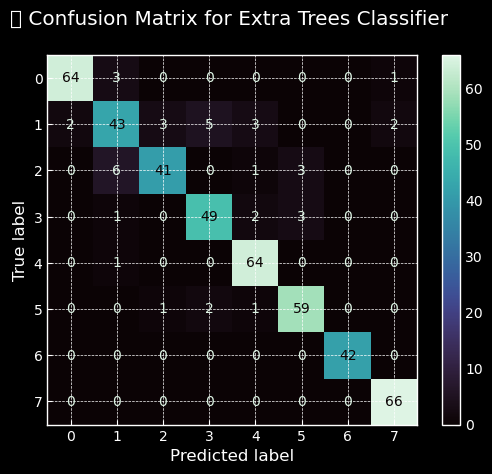

In [99]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Extra Trees Classifier \n')
plt.show()

In [100]:
# With the help of above confusion matrix we understand that the number of times we got the correct outputs and the number of times the model missed to provide the correct prediction (depicting in the black boxes)

In [101]:
# Saving the best Classification ML model

In [102]:
filename = "FinalModel_Classification_E04.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_Classification_E04.pkl']

In [103]:
# Saving the best classification model using the joblib library.

In [106]:
#Splitting the dataset into 'X' and 'Y' for feature and regression label

In [107]:
X = df.drop('capacity_mw', axis=1)
Y = df['capacity_mw']

In [108]:
# Feature Scaling

In [109]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [110]:
X.head() # Displaying all the features after applying scaling technique to avoid bias output

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,1.155327,-0.905807,1.174653,0.384586,1.578700,-1.059632
1,0.598448,-0.567933,-0.986874,0.671188,3.125148,0.400848
2,0.132019,-1.895590,1.606958,0.671188,-0.514953,0.400848
3,0.452596,3.134428,-0.554568,-0.116966,-0.491161,0.400848
4,0.141226,1.248497,-0.986874,0.671188,-0.491161,0.400848


In [111]:
# Using the Standard Scaler method to normalize feature values and ensure that my regression model does not have any kind of biasness towards a particular column value.

In [112]:
# Finding the best random state for building Regression Models

In [113]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS)

Best R2 score is 0.5342507568882501 on Random State 672


In [114]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=135)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [115]:
# I have built a regression function that splits the training and testing features and labels, then trains the model, predicts the label, calculates the RMSE score, generates the R2 score, calculates the Cross Validation score and finally finds the difference between the R2 score and Cross Validation score.

In [116]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 1.3160477532281023
R2 Score is: 50.66773177423391
Cross Validation Score: 41.93834317486533
R2 Score - Cross Validation Score is 8.729388599368576


In [117]:
# Created the Linear Regression model and checked it's evaluation metrics.

In [118]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 1.316344547852183
R2 Score is: 50.6454784738563
Cross Validation Score: 41.9648756789894
R2 Score - Cross Validation Score is 8.6806027948669


In [119]:
# Created the Ridge Regression model and checked it's evaluation metrics

In [120]:
# Lasso Regression

model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)

RMSE Score is: 1.4146177175223145
R2 Score is: 43.00116564812899
Cross Validation Score: 37.38354322322448
R2 Score - Cross Validation Score is 5.617622424904511


In [121]:
#Created the Lasso Regression model and checked it's evaluation metrics

In [122]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 1.178192072605417
R2 Score is: 60.4615189911021
Cross Validation Score: 48.73928224288537
R2 Score - Cross Validation Score is 11.72223674821673


In [123]:
#Created the Support Vector Regression model and checked it's evaluation metrics.

In [124]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 1.7843751560316197
R2 Score is: 9.309849253895308
Cross Validation Score: 18.60204042745478
R2 Score - Cross Validation Score is -9.292191173559473


In [125]:
# Created the Decision Tree Regressor model and checked it's evaluation metrics.

In [126]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 1.2705508841876059
R2 Score is: 54.019688037501304
Cross Validation Score: 45.835197694510924
R2 Score - Cross Validation Score is 8.18449034299038


In [127]:
# Created the Random Forest Regressor model and checked it's evaluation metrics.

In [128]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 1.2951984134170107
R2 Score is: 52.21843221784148
Cross Validation Score: 45.91657738502795
R2 Score - Cross Validation Score is 6.301854832813532


In [132]:
#Created the K Neighbors Regressor model and checked it's evaluation metrics.

In [130]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=250, max_depth=5)
reg(model, X, Y)

RMSE Score is: 1.6597298844461124
R2 Score is: 21.53741437804242
Cross Validation Score: 6.47011536843419
R2 Score - Cross Validation Score is 15.06729900960823


In [133]:
# Created the Gradient Boosting Regressor model and checked it's evaluation metrics.

In [134]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 1.1671359208810121
R2 Score is: 61.200095287034806
Cross Validation Score: 54.91379554379362
R2 Score - Cross Validation Score is 6.286299743241187


In [135]:
#Created the Ada Boost Regressor model and checked it's evaluation metrics.

In [136]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 1.0725495651690709
R2 Score is: 67.23406764906858
Cross Validation Score: 62.82018519589659
R2 Score - Cross Validation Score is 4.413882453171986


In [137]:
#Created the Extra Trees Regressor model and checked it's evaluation metrics.

In [139]:
# XGB Regressor

model=XGBRegressor()
reg(model, X, Y)

RMSE Score is: 1.1700265189512444
R2 Score is: 61.007669002390315
Cross Validation Score: 56.768431000290434
R2 Score - Cross Validation Score is 4.239238002099881


In [140]:
# Created the XGB Regressor model and checked it's evaluation metrics.

In [141]:
# Choosing Extra Trees Regressor

fmod_param = {'criterion' : ['mse', 'mae'],
              'n_estimators' : [100, 200],
              'min_samples_split' : [2, 3],
              'random_state' : [42, 135],
              'n_jobs' : [-1, 1]
             }

In [143]:
GSCV = GridSearchCV(ExtraTreesRegressor(), fmod_param, cv=5)

In [145]:
# Using the Grid Search CV method for hyper parameter tuning my best regression model.

In [147]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 200], 'n_jobs': [-1, 1],
                         'random_state': [42, 135]})

In [148]:
GSCV.best_params_

{'criterion': 'mse',
 'min_samples_split': 3,
 'n_estimators': 200,
 'n_jobs': -1,
 'random_state': 42}

In [149]:
# Grid Search CV has provided the best parameters list out of all the combinations it used to train the model.

In [150]:
Final_Model = ExtraTreesRegressor(criterion='mse', min_samples_split=3, n_estimators=100, n_jobs=-1, random_state=42)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 68.09997386756837


In [151]:
# Successfully incorporated the Hyper Parameter Tuning on my Final Regression Model and received the R2 score for it.

In [152]:
filename = "FinalModel_Regression_E04.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_Regression_E04.pkl']